# Logistic Loss And Gradient Descent

## Chris Tralie

In [3]:
import numpy as np
import matplotlib.pyplot as plt

logistic = lambda u: 1/(1 + np.exp(-u))

### Logistic Function
## $\sigma(u) = \frac{1}{1 + e^{-u}}$

### Squared loss:
## $L_s(u, y) = (\sigma(u) - y)^2$

Text(0.5, 1.0, 'Squared Loss')

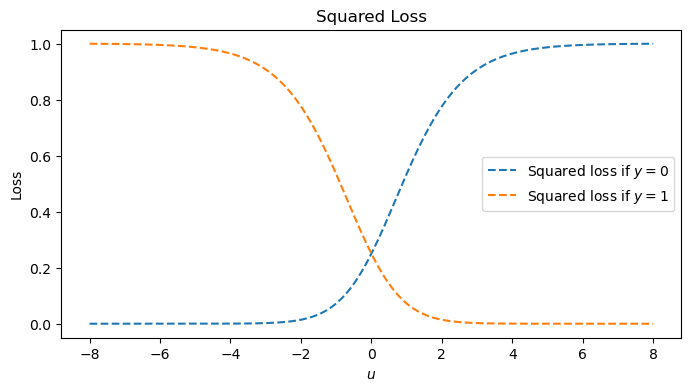

In [4]:
squared_loss = lambda u, y: (logistic(u)-y)**2

u = np.linspace(-8, 8, 200)

plt.figure(figsize=(8, 4))
plt.plot(u, squared_loss(u, 0), linestyle='--')
plt.plot(u, squared_loss(u, 1), linestyle='--')
plt.legend(["Squared loss if $y = 0$", "Squared loss if $y = 1$"])
plt.xlabel("$u$")
plt.ylabel("Loss")
plt.title("Squared Loss")


## Logistic Loss

## $L(u, y) = \left\{ \begin{array}{cc} -\log(\sigma(u)) & y = 1 \\ -\log(1-\sigma(u)) & y = 0\end{array} \right\} $

## $ L(u, y) = -y\log(\sigma(u)) - (1-y)\log(1 - \sigma(u)) $

Text(0, 0.5, 'Loss')

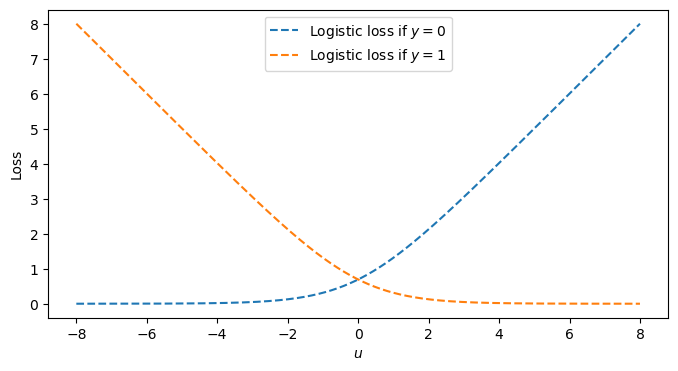

In [5]:
logistic_loss = lambda u, y: -y*np.log(logistic(u)) - (1-y)*np.log(1-logistic(u))

u = np.linspace(-8, 8, 1000)

plt.figure(figsize=(8, 4))
plt.plot(u, logistic_loss(u, 0), linestyle='--')
plt.plot(u, logistic_loss(u, 1), linestyle='--')
plt.legend(["Logistic loss if $y = 0$", "Logistic loss if $y = 1$"])
plt.xlabel("$u$")
plt.ylabel("Loss")

## Total Logistic Loss over All Examples

### $L(X, Y) = \sum_{k=0}^{N-1} -y_k\log(\sigma(u_k)) - (1-y_k)\log(1 - \sigma(u_k))$

We have a "learning rate" $\alpha$, which is how quickly we move across our parameter space.

Gradient descent: Taking gradual steps against the "gradient" (multidimensional derivative) until we reach a minimum loss in our parameter space, and we "converge" to a good set of parameter choices

### Example 1

#### Learning rate $\alpha = 0.01$

<img src = "1DLogisticEx1/lr0.01.gif">


#### Learning rate $\alpha = 0.02$

If the learning rate is too big, we take steps that are too big and oscillate back and forth

<img src = "1DLogisticEx1/lr0.02.gif">

#### Learning rate $\alpha = 0.001$

If our learning rate is too small, we're safe in a sense, but it might take too long to converge to a good choice of parameters

<img src = "1DLogisticEx1/lr0.001.gif">

### Example 2

#### Learning rate $\alpha = 0.01$

<img src = "1DLogisticEx2/lr0.01.gif">




#### Learning rate $\alpha = 0.1$

<img src = "1DLogisticEx2/lr0.1.gif">

## General Update Rules

Given a set of examples $(X, Y)$, let 

### $L(X, Y) = \sum_{k=0}^{N-1} -y_k\log(\sigma(u_k)) - (1-y_k)\log(1 - \sigma(u_k))$

then 

## $ \frac{\partial L(a, b)}{ \partial a} = a \sum_{k = 0} ^{N-1} \sigma(ax_k + b) - y_k $

## $ \frac{\partial L(a, b)}{ \partial b} = \sum_{k = 0} ^{N-1} \sigma(ax_k + b) - y_k $

## $ a = a - \alpha \frac{\partial L(a, b)}{ \partial a}, b = b - \alpha \frac{\partial L(a, b)}{ \partial b} $



## $a = a + \alpha a \sum_{k = 0} ^{N-1} (y_k - \sigma(ax_k + b) )$

## $b = b + \alpha \sum_{k = 0} ^{N-1} (y_k - \sigma(ax_k + b) )$

### Code To Generate The Above Examples

In [ ]:
def plot_logistic_neighborhood(x, y, amin, amax, bmin, bmax, res=50, loss_fn=logistic_loss, vmin=None, vmax=None):
    """
    Plot a neighborhood of a loss function evaluated on a set of points
    
    Parameters
    ----------
    x: ndarray(N)
        The 1D inputs
    y: ndarray(N)
        The labels
    amin, amax, bmin, bmax
        Neighborhood around which to display values
    res: int
        Resolution to search around (a, b)
    loss_fn: (x, y) -> float
        Loss function to apply pointwise to a bunch of estimates
    vmin: float
        vmin for colormap
    vmax: float
        vmax for colormap
    """
    aa = np.linspace(amin, amax, res)
    bb = np.linspace(bmin, bmax, res)
    aa, bb = np.meshgrid(aa, bb)
    I = np.zeros_like(aa)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            I[i, j] = np.sum(loss_fn(aa[i, j]*x + bb[i, j], y))
    if not vmax:
        vmin = np.min(I)
        vmax = np.max(I)
    plt.imshow(I, cmap='magma', extent=(amin, amax, bmax, bmin), aspect='auto', vmin=vmin, vmax=vmax)
    plt.xlabel("a")
    plt.ylabel("b")
    plt.colorbar()
    plt.gca().invert_yaxis()
    
def plot_logistic_regression_predictions(x, y, a, b, loss_fn=logistic_loss):
    """
    Plot the predictions of a 1D logistic regression function
    
    Parameters
    ----------
    x: ndarray(N)
        The 1D inputs
    y: ndarray(N)
        The labels
    a: float
        a in the model
    b: float
        b in the model
    loss_fn: (x, y) -> float
        Loss function to apply pointwise to a bunch of estimates
    """
    x0 = x[y == 0]
    x1 = x[y == 1]
    plt.scatter(x0, np.zeros(x0.size))
    plt.scatter(x1, np.ones(x1.size))
    x = np.linspace(np.min(x0)-0.1, np.max(x1)+0.1)
    y = a*x + b
    plt.plot(x, logistic(y))
    plt.plot(x, 0.5*np.ones(x.size), c='k', linestyle='--')
    wrong = 0
    for x in x0:
        y = logistic(a*x + b)
        plt.plot([x, x], [0, y], c='C0')
        if y > 0.5:
            plt.scatter([x], [0], 200, c='C0', marker='x')
            wrong += 1
    for x in x1:
        y = logistic(a*x + b)
        plt.plot([x, x], [1, y], c='C1')
        if y < 0.5:
            plt.scatter([x], [1], 200, c='C1', marker='x')
            wrong += 1
    loss = np.sum(loss_fn(a*x+b, y))
    N = x0.size + x1.size
    plt.title("Loss = {:.3f}, {} Wrong ({} % Accuracy)".format(loss, wrong, int(100*(N-wrong)/N)))

In [ ]:
np.random.seed(2)

N = 100
# Example 1
x = np.random.randn(N) + 1
y = np.zeros(N)
x = np.concatenate((x, np.random.randn(N)+4))
y = np.concatenate((y, np.ones(N)))

# Example 2
#x = np.random.randn(N)
#y = np.abs(x) < 0.5


a_initial, b_initial = np.random.randn(2)

lr = 0.01
n_iters = 30

losses = []
steps = []
a = a_initial
b = b_initial

for it in range(n_iters):
    ## TODO: Update a and b with gradient descent
    f = logistic(a*x + b)
    a += lr*np.sum(x*(y-f))
    b += lr*np.sum(y-f)
    steps.append([a, b])
    loss = np.sum(logistic_loss(a*x+b, y))
    losses.append(loss)
mins = np.min(np.array(steps), axis=0)
maxs = np.max(np.array(steps), axis=0)
dr = maxs-mins
lossmin = np.min(losses)
lossmax = np.max(losses)


losses = []
steps = []
a = a_initial
b = b_initial


plt.figure(figsize=(16, 5))

for it in range(n_iters):
    f = logistic(a*x + b)
    delta = y - f
    a += lr*np.sum(x*(y-f))
    b += lr*np.sum(y-f)
    steps.append([a, b])
    loss = np.sum(logistic_loss(a*x+b, y))
    losses.append(loss)
    
    plt.clf()
    plt.subplot(131)
    plot_logistic_regression_predictions(x, y, a, b)
    plt.subplot(132)
    plot_logistic_neighborhood(x, y, mins[0]-dr[0]*0.1, maxs[0]+dr[0]*0.1, mins[1]-dr[1]*0.1, maxs[1]+dr[1]*0.1, vmin=lossmin, vmax=lossmax)
    plt.plot(np.array(steps)[:, 0], np.array(steps)[:, 1])
    plt.scatter(np.array(steps)[:, 0], np.array(steps)[:, 1])
    plt.title("Loss Function Landscape\n$a={:.3f}, b={:.3f}$".format(a, b))
    plt.subplot(133)
    plt.plot(losses)
    plt.title("Loss Function Steps")
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.xlim([0, n_iters])
    plt.ylim([lossmin-(lossmax-lossmin)*0.05, lossmax+(lossmax-lossmin)*0.05])
    plt.savefig("Iter{}.png".format(it), facecolor='white', bbox_inches='tight')

## Higher Dimensional Logistic Regression

In general, we have an affine function in any dimension composed with $\sigma$

## $u_k = a_0 x_k[0] + a_1 x_k[1] + a_2 x_k[2] + ... + a_d x_k[d-1] + b$

## $\sigma(u_k) = \sigma(a_0 x_k[0] + a_1 x_k[1] + a_2 x_k[2] + ... + a_d x_k[d-1] + b)$


and the update rules are

## $a_i = a_i + \alpha \left( \sum_{k=0}^{N-1} x_k[i](y_k - \sigma(u_k)) \right)$

## $b = b + \alpha \left( \sum_{k=0}^{N-1} (y_k - \sigma(u_k)) \right)$

### Ex) 2D: $ u = ax + by + c$

### 2D Logistic Regression Example 1, $\alpha = 0.001$

<img src = "2DLogistic/Ex1_lr0.001.gif">


### 2D Logistic Regression Example 2, $\alpha = 0.001$

<img src = "2DLogistic/Ex2_lr0.001.gif">


### 2D Logistic Regression Example 3, $\alpha = 0.025$

<img src = "2DLogistic/Ex3_lr0.025.gif">


### 2D Logistic Regression Example 3, $\alpha = 0.001$

<img src = "2DLogistic/Ex3_lr0.001.gif">

In [ ]:
def plot_logistic_regression_predictions(X1, X2, a, b, c):
    plt.scatter(X1[:, 0], X1[:, 1])
    plt.scatter(X2[:, 0], X2[:, 1])
    X = np.concatenate((X1, X2), axis=0)
    xmin = np.min(X, axis=0)
    xmax = np.max(X, axis=0)
    iv = max(xmax[1]-xmin[1], xmax[0]-xmin[0])
    
    resol = 200
    mx = 2
    xx = np.linspace(xmin[0], xmax[0], resol)
    yy = np.linspace(xmin[1], xmax[1], resol)
    xx, yy = np.meshgrid(xx, yy)
    plt.imshow(logistic(a*xx+b*yy+c), extent=(xmin[0], xmax[0], xmax[1], xmin[1]), cmap='RdBu_r', vmin=0, vmax=1)
    
    
    p0 = -c*np.array([a, b])/(a**2 + b**2)
    v = np.array([-b, a])
    mag = np.sqrt(np.sum(v**2))
    if mag > 0:
        v = v/mag
        p = p0 - 2*iv*v
        q = p0 + 2*iv*v
        plt.plot([p[0], q[0]], [p[1], q[1]])
        rg = xmax[0] - xmin[0]
        plt.xlim([xmin[0]-0.2*rg, xmax[0]+0.2*rg])
        rg = xmax[1] - xmin[1]
        plt.ylim([xmin[1]-0.2*rg, xmax[1]+0.2*rg])

        wrong = 0
        for x in X1:
            y = logistic(a*x[0] + b*x[1] + c)
            proj = p0 + np.sum(v*(x-p0))*v
            #plt.plot([x[0], proj[0]], [x[1], proj[1]], c='C0')
            if y > 0.5:
                plt.scatter([x[0]], [x[1]], 200, c='C0', marker='x')
                wrong += 1
        for x in X2:
            y = logistic(a*x[0] + b*x[1] + c)
            proj = p0 + np.sum(v*(x-p0))*v
            #plt.plot([x[0], proj[0]], [x[1], proj[1]], c='C1')
            if y < 0.5:
                plt.scatter([x[0]], [x[1]], 200, c='C1', marker='x')
                wrong += 1
        N = X.shape[0]
        plt.title("a = {:.3f}, b = {:.3f}, c = {:.3f}\n{} Wrong ({} % Accuracy)".format(a, b, c, wrong, int(100*(N-wrong)/N)))
        plt.axis("equal")


np.random.seed(0)
a_initial, b_initial, c_initial = np.random.randn(3)
lr = 0.01
n_iters = 20

# Example 1
#X0 = np.random.rand(100, 2) - np.array([[1, 0]]) # 100 0 examples between x = [-1, 0], y = [0, 1]
#X1 = np.random.rand(100, 2) + np.array([[0.5, 0]])
#X = np.concatenate((X0, X1), axis=0)
#y = np.zeros(X.shape[0])
#y[X0.shape[0]::] = 1

# Example 2
#X = np.random.randn(200, 2)
#r = np.sqrt(np.sum(X**2, axis=1))
#X0 = X[r < 1, :] # Examples that have radius < 1
#X1 = X[r >= 1, :] # Examples that have radius >= 1
#y = r >= 1

# Example 3

X0 = np.random.rand(200, 2)
X1 = 4*np.random.rand(200, 2) - 2 
X = np.concatenate((X0, X1), axis=0)
y = np.zeros(X.shape[0])
y[X0.shape[0]::] = 1

losses = []
steps = []
a = a_initial
b = b_initial
c = c_initial

xmin = np.min(X, axis=0)
xmax = np.max(X, axis=0)
rg = xmax-xmin
xmin -= 0.1*rg
xmax += 0.1*rg


plt.figure(figsize=(16, 5))
for it in range(n_iters):
    f = logistic(a*X[:, 0] + b*X[:, 1] + c)
    a += lr*np.sum(X[:, 0]*(y-f))
    b += lr*np.sum(X[:, 1]*(y-f))
    c += lr*np.sum(y-f)
    
    steps.append([a, b, c])
    loss = np.sum(logistic_loss(a*X[:, 0] + b*X[:, 1] + c, y))
    losses.append(loss)
    
    plt.clf()
    plt.subplot(121)
    plot_logistic_regression_predictions(X0, X1, a, b, c)
    plt.xlim(xmin[0], xmax[0])
    plt.ylim(xmin[1], xmax[1])
    plt.subplot(122)
    plt.plot(losses)
    plt.title("Loss Function Steps")
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.xlim([0, n_iters])
    plt.savefig("Iter{}.png".format(it), facecolor='white', bbox_inches='tight')